In [1]:
# from google.colab import drive
# from google.colab import userdata

# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/Coding/Kaggle/kaggle-houses/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


# Basic Model

In [27]:
def set_dotenv():
    import os
    from dotenv import load_dotenv

    load_dotenv(dotenv_path='variables.env')

    kaggle_username = os.getenv("KAGGLE_USERNAME")
    kaggle_key = os.getenv("KAGGLE_KEY")

    os.environ["KAGGLE_USERNAME"] = kaggle_username
    os.environ["KAGGLE_KEY"] = kaggle_key

def kaggle_download(dataset, output_path='./raw_data/'):
    set_dotenv()

    import kaggle
    import zipfile

    kaggle.api.competition_download_files('house-prices-advanced-regression-techniques', path=output_path)

    with zipfile.ZipFile(f'{output_path}house-prices-advanced-regression-techniques.zip', 'r') as zip_ref:
        zip_ref.extractall(output_path)

def data_target(df, target):
    X = df[list(set(df.columns) - set(target))].drop(columns=[target])
    y = df[target]

    return X, y

def EDA_feat(col):
    plt.subplots(1,3, figsize=(24,6))
    plt.subplot(1,3,1)
    sns.boxplot(col, width=0.2, orient='h')
    plt.ylabel(f'{col.name}')


    plt.subplot(1,3,2)
    sns.histplot(col, stat='density')
    plt.xlabel(f'{col.name}')

    plt.subplot(1,3,3)
    sns.kdeplot(col, label=col.name)
    mean, std_dev = np.mean(col), np.std(col)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    pdf = norm.pdf(x, mean, std_dev)
    sns.lineplot(x=x, y=pdf, color='b', alpha=0.2, label='Gaussian Distribution')
    plt.axvline(mean - 3*std_dev, color='r', alpha=0.2)
    plt.axvline(mean + 3*std_dev, color='r', alpha=0.2)
    plt.text(mean + 3.25*std_dev, np.array(plt.ylim()).mean(), "3 $\\sigma$", rotation=90, verticalalignment='center')
    plt.text(mean - 3.35*std_dev, np.array(plt.ylim()).mean(), "-3 $\\sigma$", rotation=90, verticalalignment='center')
    


In [28]:
# dataset_name = 'house-prices-advanced-regression-techniques'
# kaggle_download(dataset_name)

In [29]:
df = pd.read_csv('./raw_data/train.csv') # Local

# df = pd.read_csv('./data/train.csv') # Google collab

In [30]:
X, y = data_target(df, 'SalePrice')

In [31]:
print(X.columns)

Index(['SaleType', 'RoofStyle', 'HouseStyle', 'MasVnrType', 'GarageYrBlt',
       'ExterCond', 'Utilities', 'FullBath', 'BedroomAbvGr', 'LowQualFinSF',
       'Street', 'MasVnrArea', 'YrSold', 'BsmtQual', 'OpenPorchSF',
       '3SsnPorch', '1stFlrSF', 'EnclosedPorch', 'MoSold', 'PavedDrive',
       'BsmtCond', 'Functional', 'RoofMatl', 'BsmtFullBath', 'YearRemodAdd',
       'GarageQual', 'LotFrontage', '2ndFlrSF', 'LotShape', 'BsmtFinType1',
       'GarageCond', 'Electrical', 'BsmtFinType2', 'ScreenPorch', 'LotConfig',
       'GarageType', 'BldgType', 'SaleCondition', 'MSSubClass', 'YearBuilt',
       'GrLivArea', 'ExterQual', 'MiscFeature', 'Alley', 'Fireplaces',
       'OverallCond', 'BsmtFinSF2', 'HalfBath', 'BsmtUnfSF', 'KitchenQual',
       'Foundation', 'Condition1', 'MSZoning', 'BsmtHalfBath', 'Condition2',
       'Exterior2nd', 'HeatingQC', 'BsmtExposure', 'Heating', 'CentralAir',
       'Fence', 'LandSlope', 'TotRmsAbvGrd', 'GarageCars', 'Id', 'MiscVal',
       'BsmtFinSF1', '

In [32]:
selected_cols = ['GrLivArea', 'OverallCond', 'OverallQual', 'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt']
X = X[selected_cols]

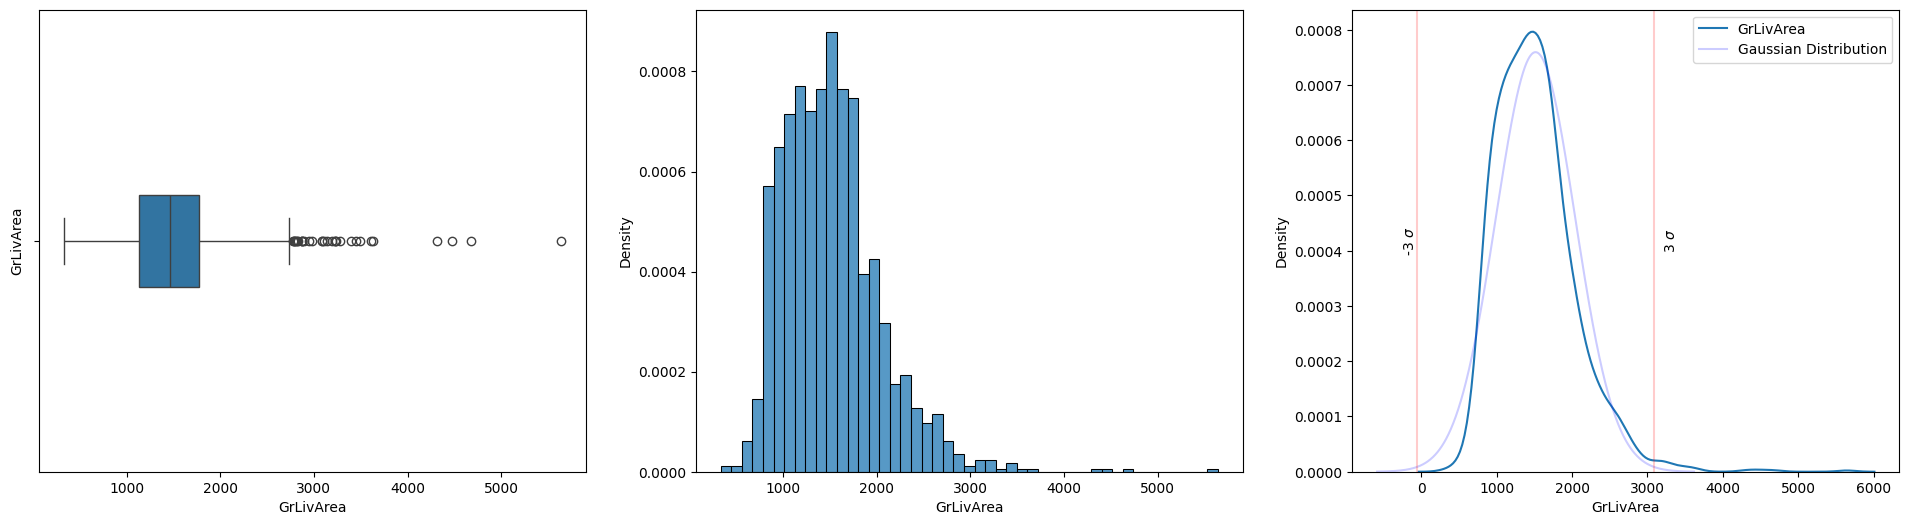

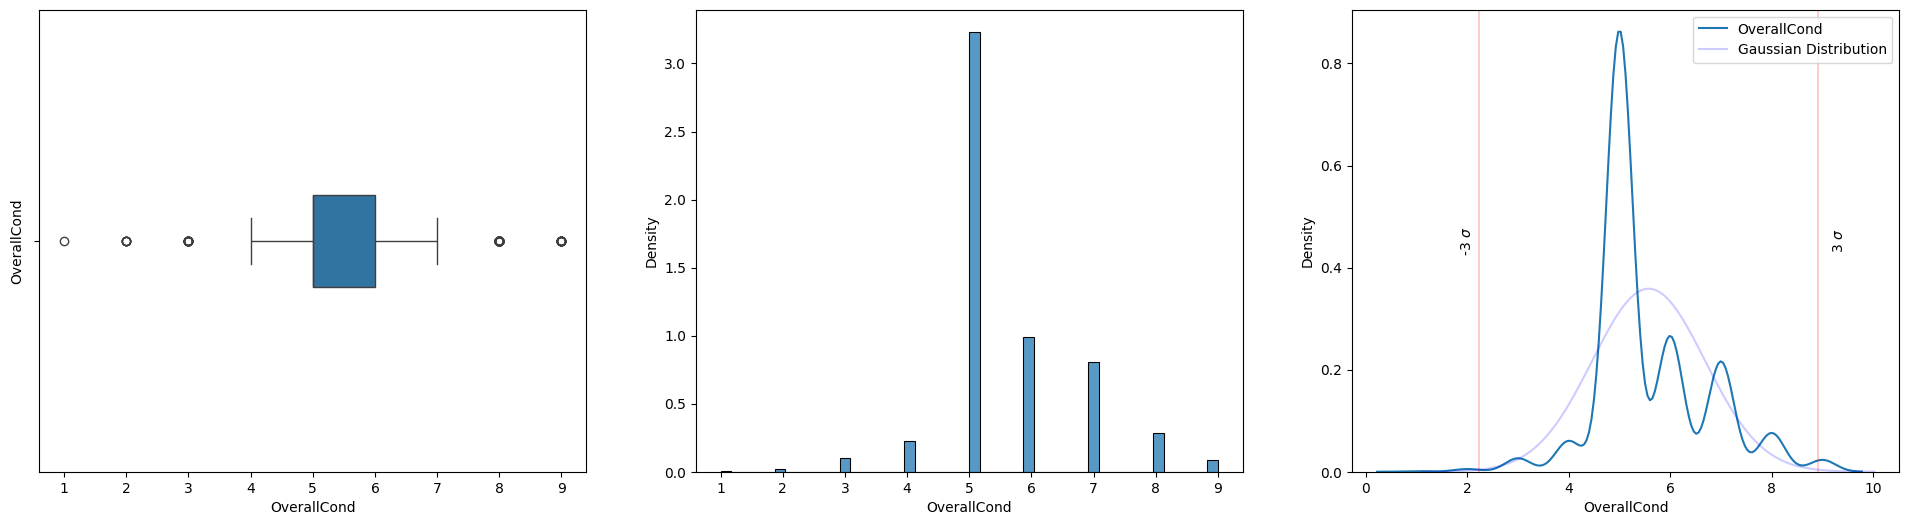

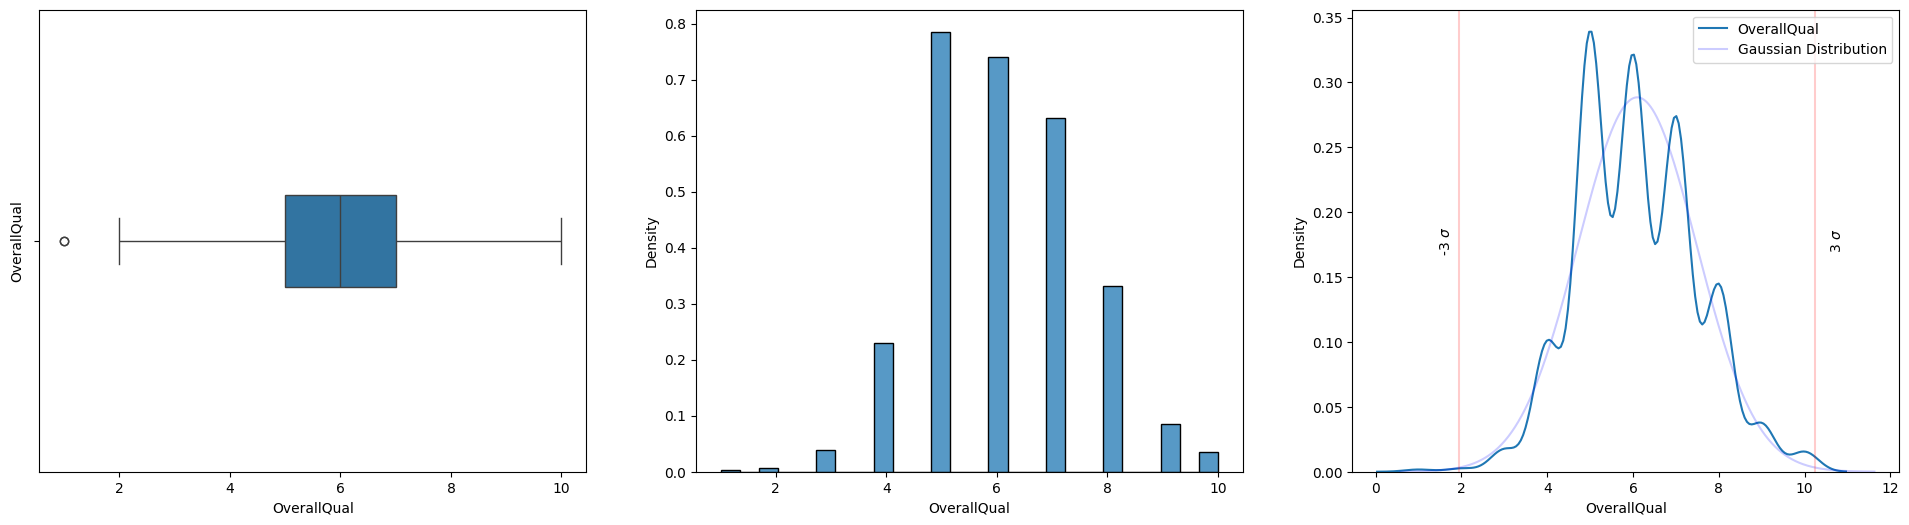

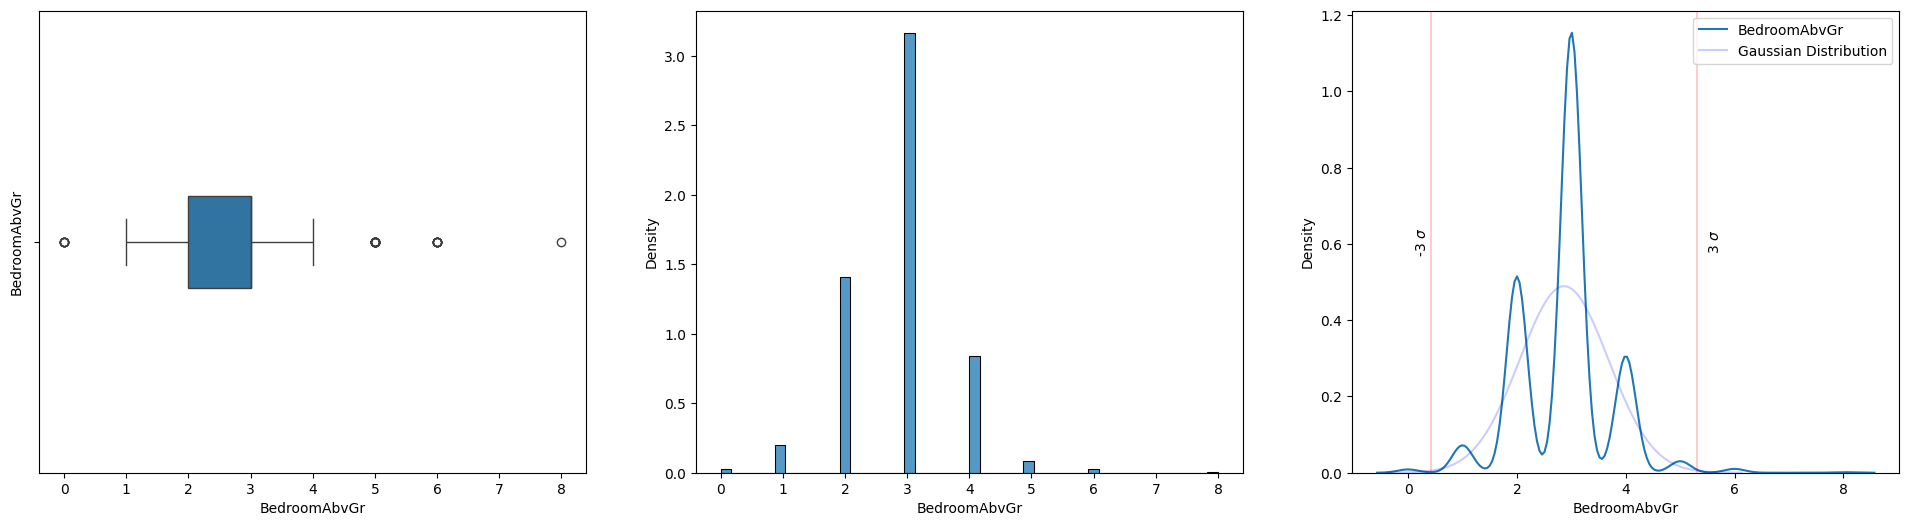

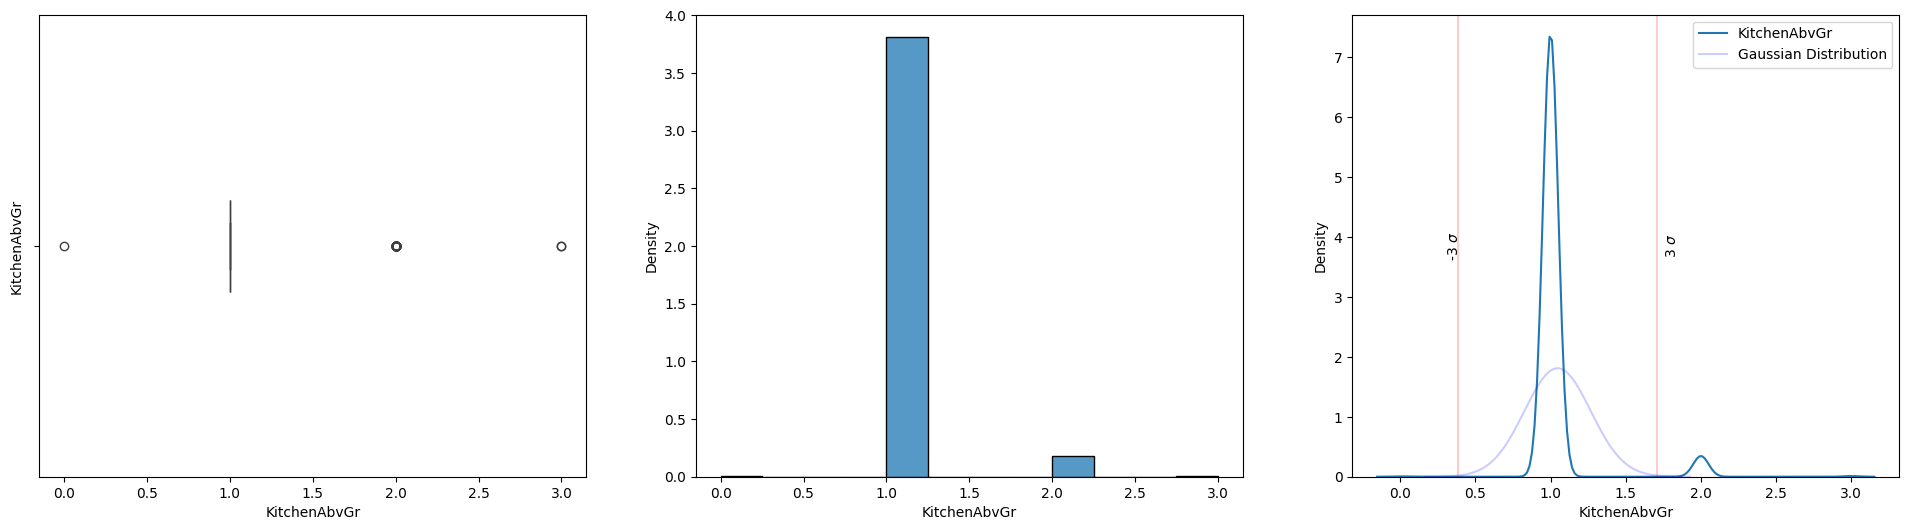

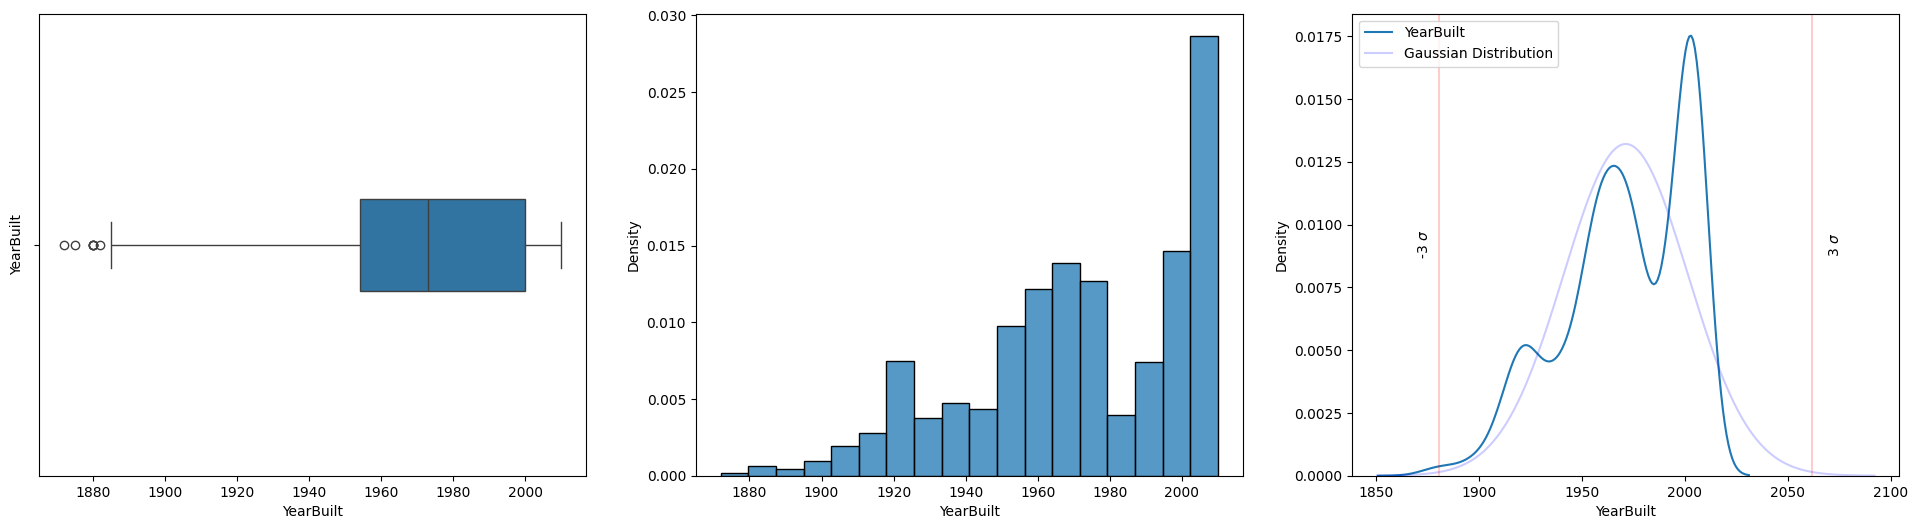

In [33]:
for col in X.columns:
    EDA_feat(X[col])

In [22]:
from sklearn.model_selection import train_test_split, cross_validate

X['DecadeBuilt'] = pd.cut(X['YearBuilt'],bins=np.arange(1850, 2011, 10))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

As scaler, we could think in using a log transformation or boxcox to address the skewness of the distributions but for now, since this is a base model, let's do only the Robust Scaler

In [23]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaling_col = list(set(X.columns) - {'YearBuilt', 'DecadeBuilt'})

scaler = RobustScaler()
X_scaled = X_train
X_scaled[scaling_col] = scaler.fit_transform(X_train[scaling_col]) 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = LinearRegression()
cv_results = cross_validate(estimator=model, X=X_scaled[scaling_col], y=y_train, cv=5)

In [25]:
cv_results['test_score'].mean()

0.7171892936631292

# Deep learning model

In [26]:
# df = pd.read_csv('./raw_data/train.csv') # Local
# # df = pd.read_csv('./data/train.csv') # Google collab
# X, y = data_target(df, 'SalePrice')
# selected_cols = ['GrLivArea', 'OverallCond', 'OverallQual', 'BedroomAbvGr', 'KitchenAbvGr', 'YearBuilt']
# X = X[selected_cols]
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
# scaling_col = list(set(X_train.columns) - {'YearBuilt', 'DecadeBuilt'})
# scaler_dict, X_train = batch_scaling(X_train[scaling_col], 'RS')

In [15]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.regularizers import l2

In [16]:
# optimizer = Adam(learning_rate=0.005)
# callback = EarlyStopping(monitor='val_loss', patience=10)

# n_epochs = 500
# batch_size = 4

In [17]:
# input_layer = Input(shape=(X_train.shape[1],))
# dense_layer_1 = Dense(64, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='normal')(input_layer)
# dense_layer_2 = Dense(32, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='normal')(dense_layer_1)
# dense_layer_3 = Dense(16, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='normal')(dense_layer_2)
# output_layer = Dense(1, activation='linear')(dense_layer_3)

# model = Model(inputs=input_layer, outputs=output_layer)

In [18]:
# model.compile(optimizer=optimizer, loss='msle', metrics=['msle'])

In [19]:
# history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, callbacks=[callback])

In [20]:
# plt.plot(history.history['loss'])

In [21]:
# results = model.evaluate(X_test.drop(columns=['YearBuilt']), y_test)
# print(f"RMLSE achieved after {n_epochs} epochs = {round(results[1]**0.5,3)}")
